In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [38]:
df = pd.read_csv("D:\\Python basics\\CLTV-360\\CSV files\\Cleaned_online_retail.csv")

In [39]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,InvoiceWeekDay,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,08:26,Wednesday,15.3


**SECTION 1 : ANALYSIS ABOUT THE CUSTOMERS**

***1 TOP SPENDING CUSTOMERS***

Text(0.5, 0, 'Total Price ($)')

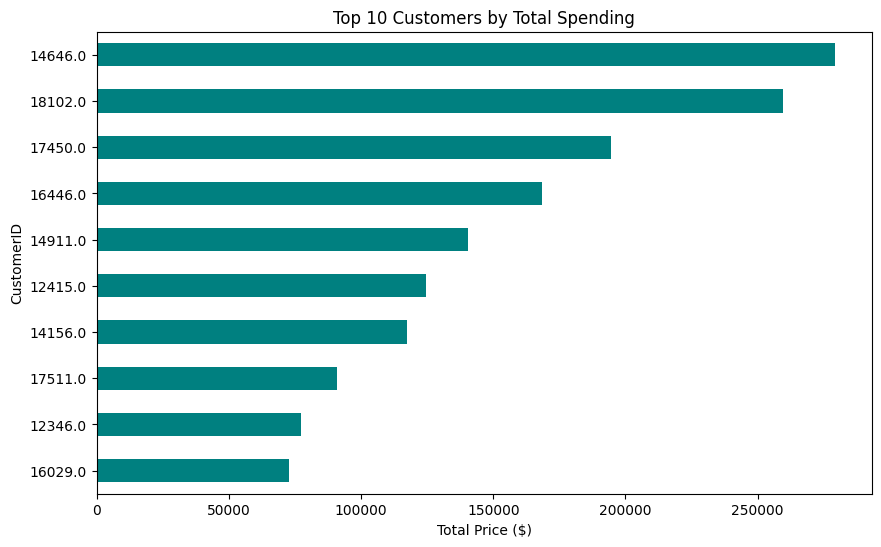

In [40]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Reverse for ascending order in plot
top_customers = top_customers.sort_values(ascending=True)

# Plot
top_customers.plot(kind='barh', figsize=(10,6), color='teal', title='Top 10 Customers by Total Spending')
plt.xlabel ('Total Price ($)')


***2.Number of Unique Customers***

In [41]:
unique_customers = df['CustomerID'].nunique()
unique_customers

4335

***3.ORDER FREQUENCY***

In [42]:
order_frequency = df.groupby("CustomerID")['InvoiceNo'].nunique()
order_frequency.mean()

np.float64(4.248212226066897)

3.1 TOP LOYAL CUSTOMERS 

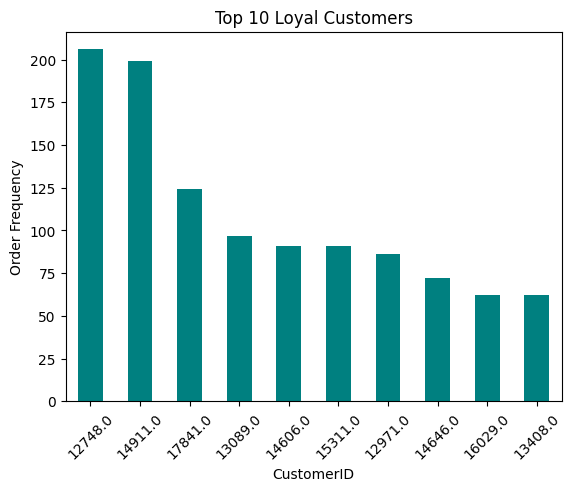

In [43]:
loyal_customer= order_frequency.sort_values(ascending=False).head(10)
plt.Figure(figsize=(8,5))
loyal_customer.plot( kind= "bar",title="Top 10 Loyal Customers",color= "teal")
plt.xlabel("CustomerID")
plt.xticks( rotation = 45)
plt.ylabel("Order Frequency")
plt.show()

3.2 ONE TIME BUYERS 

In [44]:
one_time = order_frequency[order_frequency==1]
len(one_time)

1505

3.3 DISTRIBUTION ORDER OF FREQUENCY 

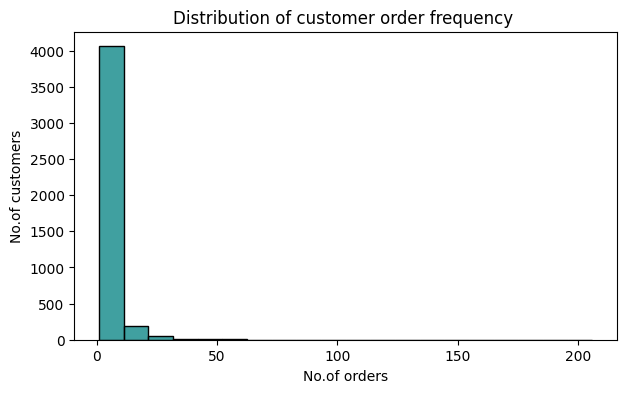

In [45]:
plt.figure ( figsize=(7,4))
sns.histplot( order_frequency,bins=20,color="teal")
plt.title("Distribution of customer order frequency ")
plt.xlabel("No.of orders")
plt.ylabel("No.of customers")
plt.show()

<Axes: ylabel='InvoiceNo'>

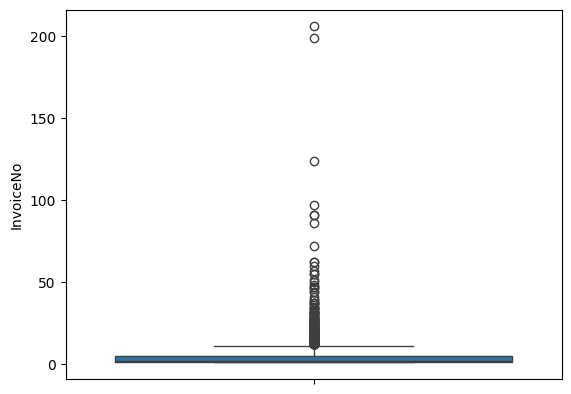

In [46]:
sns.boxplot(order_frequency)

Analysis:- Most customers placed only 1–3 orders — shows low repeat buying.
The distribution is right-skewed, with a few customers placing 50+ orders (outliers) or may be they are vendors .
Indicates a need for better customer retention strategies.
Suggests marketing focus on re-engaging low-frequency customers.

***4.AVERAGE ORDER VALUE (AOV) PER CUSTOMER***

In [47]:
aov = df.groupby ("CustomerID").apply( lambda x:x['TotalPrice'].sum()/x['InvoiceNo'].nunique())
aov_sorted= aov.sort_values(ascending=False).head(10).round(2)
aov_sorted


C:\Users\Saurav\AppData\Local\Temp\ipykernel_18524\2649445409.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov = df.groupby ("CustomerID").apply( lambda x:x['TotalPrice'].sum()/x['InvoiceNo'].nunique())


CustomerID
16446.0    84236.25
12346.0    77183.60
15749.0    14844.77
15098.0    13305.50
12590.0     9341.26
12415.0     6228.23
12357.0     6207.67
12688.0     4873.81
12752.0     4366.78
18102.0     4327.62
dtype: float64

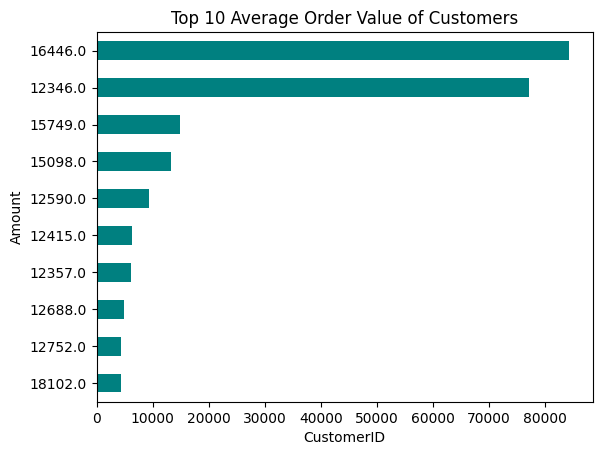

In [48]:
plt.Figure(figsize=(8,5))
aov_sorted.plot(kind= "barh",color= "teal",)
plt.title("Top 10 Average Order Value of Customers")
plt.xlabel("CustomerID")
plt.ylabel("Amount")
plt.gca().invert_yaxis() 
plt.xticks(rotation=0)
plt.show()

Amalysis:- The horizontal bar chart displays the Top 10 Customers with the highest Average Order Value (AOV).
Customers with IDs in the 70,000–80,000 range dominate the top positions, indicating they make fewer but high-value purchases. This insight can guide premium targeting strategies in marketing.


***5.AVERAGE BASKET ANALYSIS***

In [49]:
total_quantity = df.groupby('CustomerID')['Quantity'].sum()


In [50]:
avg_basket_size = (total_quantity/order_frequency).sort_values(ascending=False)
top_basket = avg_basket_size.head(10).round(2)

In [51]:
top_basket

CustomerID
12346.0    74215.00
16446.0    40498.50
18251.0     7824.00
15749.0     6009.33
13135.0     4300.00
12590.0     4282.00
16754.0     4280.00
18087.0     3906.00
12415.0     3868.65
12688.0     3028.00
dtype: float64

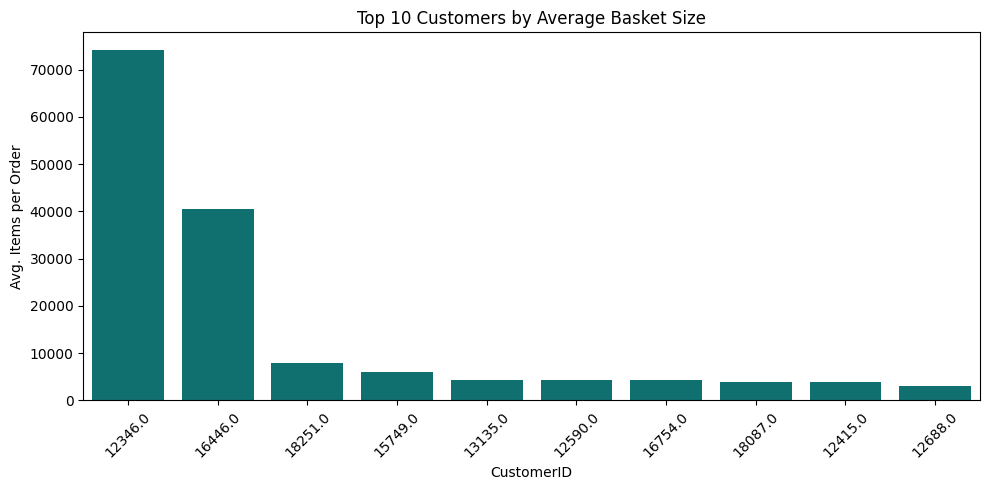

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_basket.index.astype(str), y=top_basket.values, color='teal')
plt.title("Top 10 Customers by Average Basket Size")
plt.xlabel("CustomerID")
plt.ylabel("Avg. Items per Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**SECTION 2 : SALES REVENUE PATTERNS**

***1.MONTHLY REVENUE TREND***

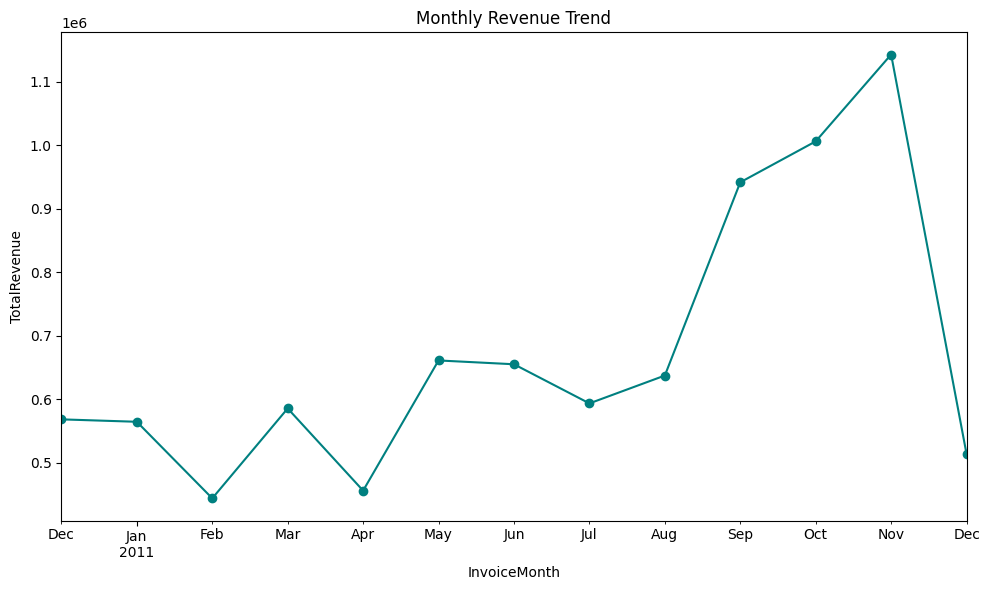

In [53]:
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

monthly_revenue = df.groupby ("InvoiceMonth")['TotalPrice'].sum()

# visualise 
plt.figure(figsize=(10,6))
monthly_revenue.plot( kind= 'line',marker= 'o',title="Monthly Revenue Trend",color= 'teal')
plt.xlabel("InvoiceMonth")
plt.ylabel("TotalRevenue")
plt.tight_layout()
plt.show()

***2.DAILY SALES TREND***

In [54]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceYear', 'InvoiceMonth',
       'InvoiceDay', 'InvoiceTime', 'InvoiceWeekDay', 'TotalPrice'],
      dtype='object')

In [55]:


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column with just the date (no time)
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date

In [56]:
daily_sales = df.groupby ("InvoiceDateOnly") ["TotalPrice"].sum ()

In [57]:
daily_sales.sort_values(ascending=False)

InvoiceDateOnly
2011-12-09    184190.28
2011-09-20    103338.46
2011-01-18     87160.71
2011-10-05     73529.43
2011-11-23     70492.92
                ...    
2011-02-13      5713.63
2010-12-23      5519.37
2010-12-22      4841.52
2011-03-13      4100.04
2011-02-06      3457.11
Name: TotalPrice, Length: 305, dtype: float64

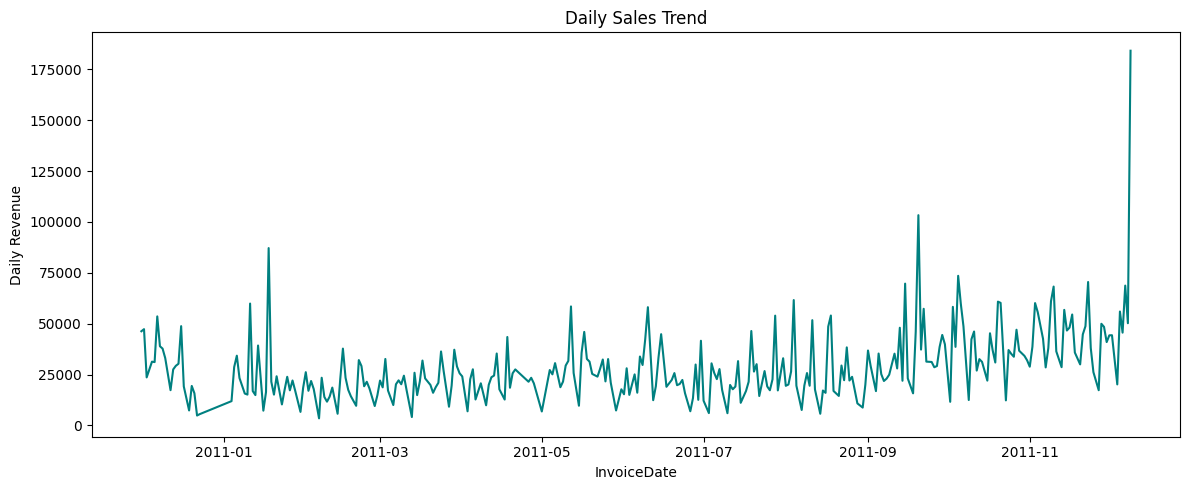

In [58]:
daily_sales.plot(figsize=(12,5), title='Daily Sales Trend',color = 'teal')
plt.xlabel("InvoiceDate")
plt.ylabel("Daily Revenue")
plt.tight_layout()
plt.show()

***3.WEEK DAY REVENUE TREND***

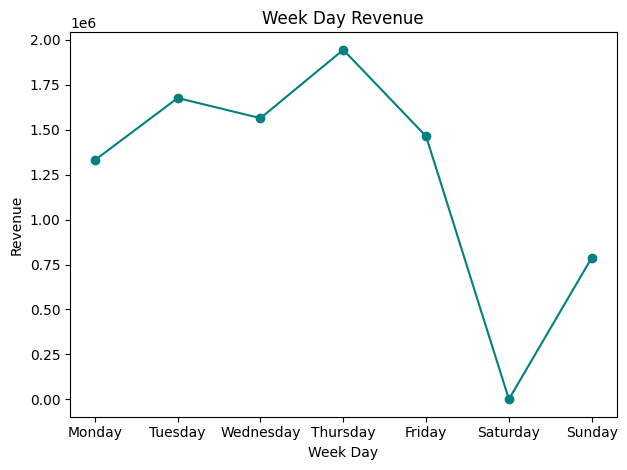

In [59]:
weekday_revenue = df.groupby ("InvoiceWeekDay")['TotalPrice'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_revenue= weekday_revenue.reindex(weekday_order,fill_value=0)
weekday_revenue.plot( kind= 'line',color= 'teal',marker="o")
plt.title('Week Day Revenue')
plt.xlabel("Week Day")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [60]:
weekday_revenue

InvoiceWeekDay
Monday       1330942.49
Tuesday      1676548.95
Wednesday    1564601.59
Thursday     1944963.25
Friday       1463598.67
Saturday           0.00
Sunday        787262.70
Name: TotalPrice, dtype: float64

CONCLUSION - "Saturday revenue appears to be zero in our analysis. Upon investigation, it was found that either the business does not operate on Saturdays or the available data did not contain valid Saturday transactions due to prior necessary data cleaning (e.g., removing returns, nulls, or invalid entries). Therefore, Saturday was excluded from meaningful comparison."

***4. Top 10 Selling Products by Revenue***

In [61]:
top_product = df.groupby ("Description")['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_product)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
RABBIT NIGHT LIGHT                     51346.20
CHILLI LIGHTS                          46286.51
PAPER CHAIN KIT 50'S CHRISTMAS         42660.83
Name: TotalPrice, dtype: float64


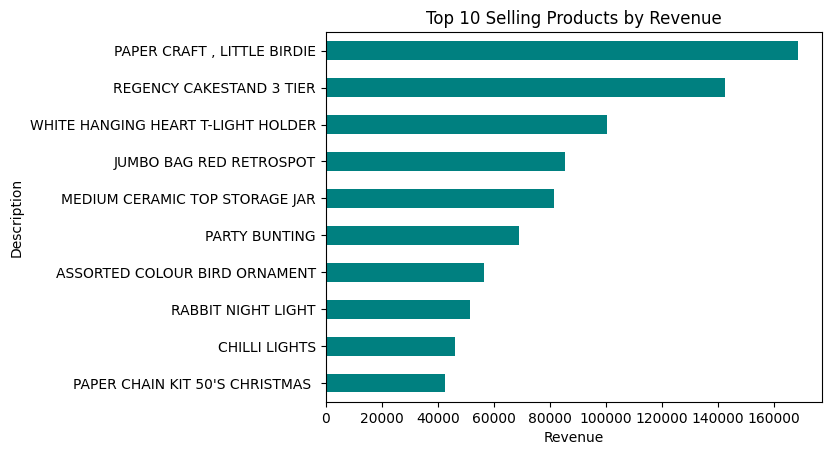

In [62]:
plt.Figure(figsize=(10,7))
top_product.plot( kind='barh',color= 'teal',title="Top 10 Selling Products by Revenue")
plt.gca().invert_yaxis() 
plt.ylabel("Description")
plt.xlabel("Revenue")
plt.show()



**5.DISTRIBUTION OF QUANTITY PER INVOICE**

Text(0, 0.5, 'No of Invoices')

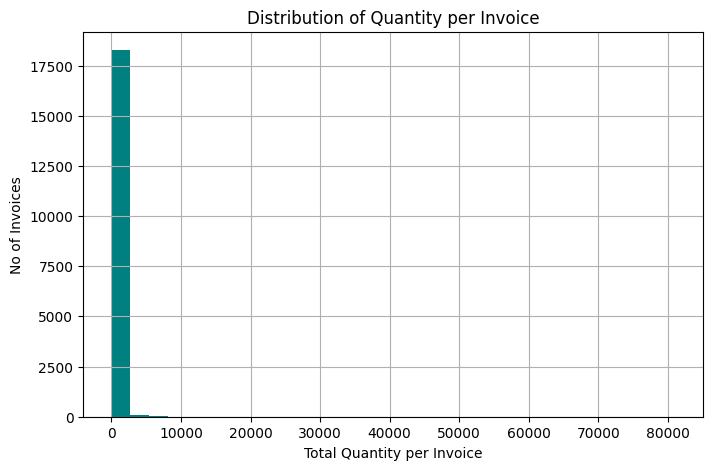

In [63]:
qty_per_invoice = df.groupby('InvoiceNo')['Quantity'].sum()
qty_per_invoice.hist(bins=30, color='teal', figsize=(8,5))
plt.title('Distribution of Quantity per Invoice')
plt.xlabel("Total Quantity per Invoice")
plt.ylabel("No of Invoices")

Conclusion- The distribution of quantity per invoice is highly right-skewed, indicating that most orders are of small size(low item count). However, a small number of invoices have extremely large quantities, suggesting either bulk purchasing behavior or potential data anomalies.

**6. Average Sales per Invoice (Invoice Value)**

In [64]:
invoice_sales = df.groupby('InvoiceNo')['TotalPrice'].sum()

<Axes: title={'center': 'Invoice Total Value Distribution'}, ylabel='Frequency'>

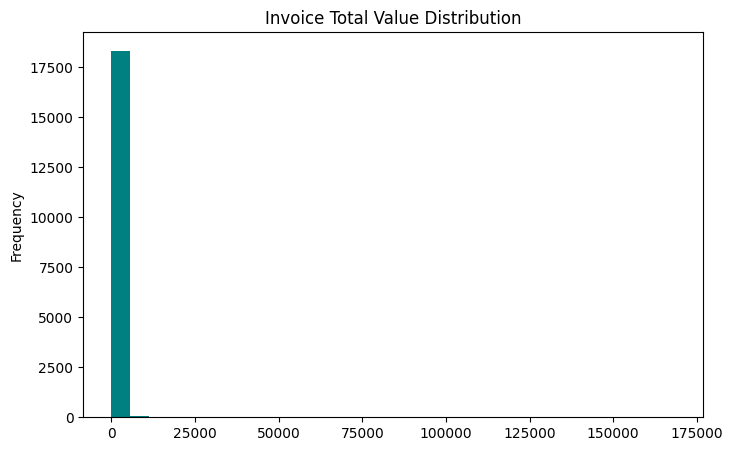

In [65]:
invoice_sales.plot(kind='hist', bins=30, figsize=(8,5), color='teal', title='Invoice Total Value Distribution')


conclusion :The distribution of total invoice values is highly right-skewed, indicating that the majority of customer invoices are of low monetary value, typically under ₹5,000. Only a small number of invoices reflect high-value purchases, which appear as outliers on the far right of the graph. This suggests that most customers make small, frequent purchases, while big transactions are rare but impactful.

***7.REVENUE CONTRIBUTION BY EACH PRODUCT***

In [66]:
product_rev_cumsum = top_product.cumsum() / top_product.sum()


In [67]:
product_rev_cumsum

Description
PAPER CRAFT , LITTLE BIRDIE           0.199640
REGENCY CAKESTAND 3 TIER              0.368616
WHITE HANGING HEART T-LIGHT HOLDER    0.487649
JUMBO BAG RED RETROSPOT               0.588638
MEDIUM CERAMIC TOP STORAGE JAR        0.685118
PARTY BUNTING                         0.766700
ASSORTED COLOUR BIRD ORNAMENT         0.833749
RABBIT NIGHT LIGHT                    0.894595
CHILLI LIGHTS                         0.949446
PAPER CHAIN KIT 50'S CHRISTMAS        1.000000
Name: TotalPrice, dtype: float64

Conclusion-The cumulative revenue contribution  reveals that:                                  

-The top 3 products alone (like "PAPER CRAFT, LITTLE BIRDIE", "REGENCY CAKESTAND 3 TIER", and "WHITE HANGING HEART T-LIGHT HOLDER") contribute to nearly 49% of total revenue.                      

-Just 7 products together make up over 83% of the total revenue.               

-By the time we reach the 9th product ("CHILLI LIGHTS"), the cumulative contribution hits 95%, showing that only a small number of products drive most of the revenu                  

***8.TOP COUNTRIES BY REVENUE***

In [68]:
top_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

In [69]:
top_country

Country
United Kingdom    7267502.23
Netherlands        283889.34
EIRE               262171.56
Germany            205569.89
France             184077.68
Australia          138171.31
Spain               55725.11
Switzerland         52441.95
Japan               37416.37
Belgium             36927.34
Name: TotalPrice, dtype: float64

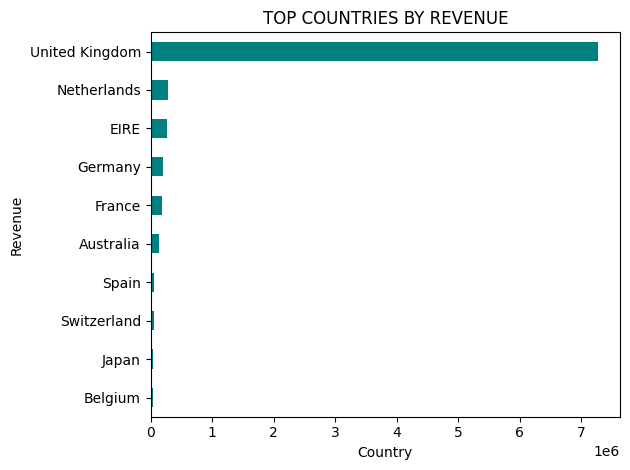

In [70]:
plt.Figure(figsize=(10,6))
top_country.plot(kind='barh',title='TOP COUNTRIES BY REVENUE',color='teal')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()